In [2]:
import pandas as pd

PATH_TO_RAW_DATA = "../data/rick_and_morty_master.csv"
PATH_TO_CLEAN_DATA = "../data/rick_and_morty_master_clean.csv"

df = pd.read_csv( PATH_TO_RAW_DATA , index_col = "Unnamed: 0")

df


,episode no.,speaker,dialouge
0,1,Rick,"\nstumbles in drunkenly, and turns on the ligh..."
1,1,Morty,"\nrubs his eyes. What, Rick? What’s going on?"
2,1,Rick,"I got a surprise for you, Morty."
3,1,Morty,It's the middle of the night. What are you ta...
4,1,Rick,"\nspills alcohol on Morty's bed Come on, I got..."
...,...,...,...
9613,51,Mr. Poopybutthole:,Cuz I wanted her to love who she thought I wa...
9614,51,Mr. Poopybutthole:,Ever think about how horrified the people we ...
9615,51,Mr. Poopybutthole:,Wish I didn’t do that.\n
9616,51,Mr. Poopybutthole:,Wish I was brave enough to love them back. I ...


In [3]:
df["speaker"] = df["speaker"].apply(lambda x: str(x).replace(":" , "").replace(" ", ""))

In [4]:
import matplotlib.pyplot as plt
import numpy as np

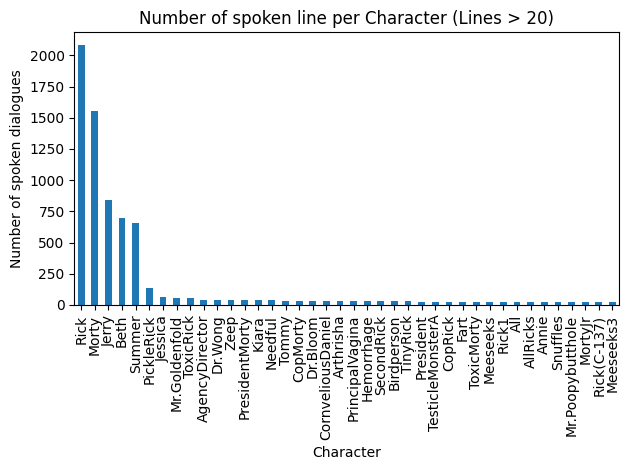

In [5]:
df["speaker"].value_counts().loc[lambda x: x > 20].plot(kind="bar")
plt.title("Number of spoken line per Character (Lines > 20)")
plt.xlabel("Character")
plt.ylabel("Number of spoken dialogues")
plt.tight_layout()
plt.savefig('images/speaker_distribution.png', format='png', transparent=True)

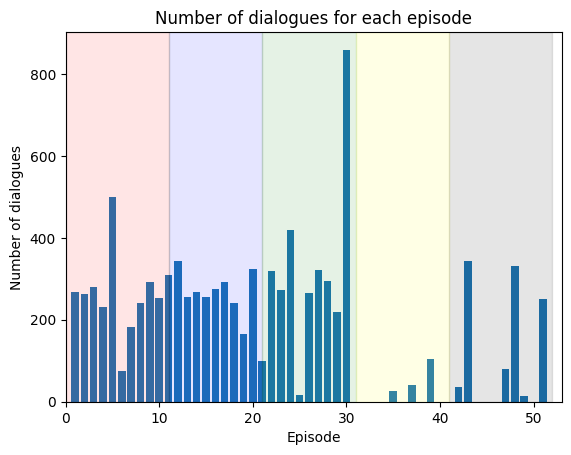

In [6]:
last_episode = df["episode no."].values[-1]
x_axis = np.array(range(last_episode)) + 1
Y_axis = [ df["episode no."].value_counts()[i] if i in df["episode no."].value_counts().keys() else 0  for i in x_axis ]

plt.bar(x_axis , Y_axis)
plt.title("Number of dialogues for each episode")
plt.xlabel("Episode")
plt.ylabel("Number of dialogues")
plt.xlim(0,last_episode + 2)
plt.axvspan(0, 11, color='red', alpha=0.1 , ec="black" , label="Season 1")
plt.axvspan(11, 21, color='blue', alpha=0.1 , ec="black")
plt.axvspan(21, 31, color='green', alpha=0.1)
plt.axvspan(31, 41, color='yellow', alpha=0.1)
plt.axvspan(41, 52, color='black', alpha=0.1)
plt.xlim(0,)
plt.savefig('images/episode_distribution.png', format='png', transparent=True)

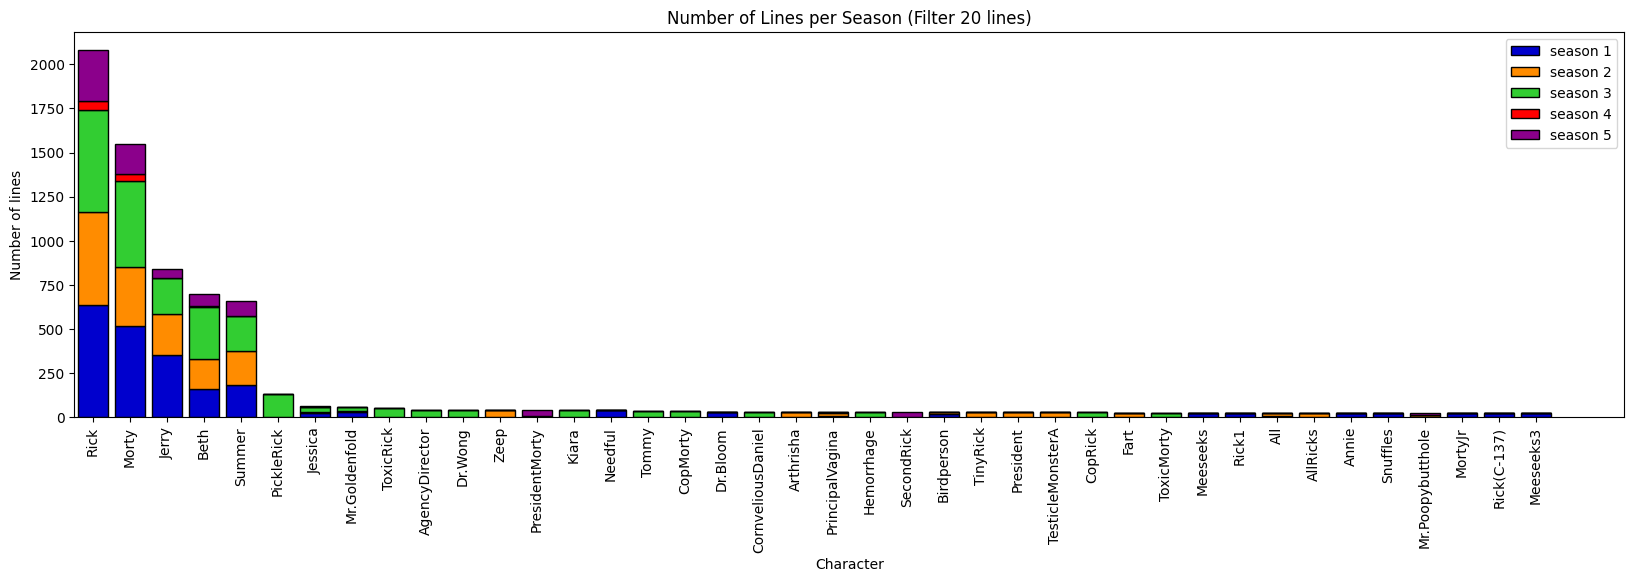

In [7]:
seasons_splitter = [(1,11) , (12,21) , (22,31) , (32,41) , (42,51) , (51, 70)]
seasons_dfs = []
y_axises = []

for splitter in seasons_splitter:
    seasons_dfs.append(df[(df["episode no."] >= splitter[0]) &  (df["episode no."] <= splitter[1])])

speakers = df["speaker"].value_counts().loc[lambda x: x > 20].index.tolist()

for season_df in seasons_dfs:
    y_axis = []
    for s in speakers:
        try: 
            y_axis.append(season_df["speaker"].value_counts()[s])
        except:
            y_axis.append(0)
    y_axises.append(y_axis)

fig, ax = plt.subplots(figsize=(20, 5))


plt.bar( speakers , np.array(y_axises[0]) , width=0.8 , color="mediumblue" , edgecolor="black")
plt.bar( speakers , np.array(y_axises[1]), bottom=np.array(y_axises[0])  , width=0.8 , color="darkorange" , edgecolor="black")
plt.bar( speakers , np.array(y_axises[2]), bottom=np.array(y_axises[1]) + np.array(y_axises[0]) , width=0.8 , color="limegreen" , edgecolor="black")
plt.bar( speakers , np.array(y_axises[3]), bottom=np.array(y_axises[2]) + np.array(y_axises[1]) + np.array(y_axises[0]), width=0.8 , color="red" , edgecolor="black")
plt.bar( speakers , np.array(y_axises[4]), bottom=np.array(y_axises[3]) + np.array(y_axises[2]) + np.array(y_axises[1]) + np.array(y_axises[0]), width=0.8 , color="darkmagenta", edgecolor="black")
plt.title("Number of Lines per Season (Filter 20 lines)")
plt.xlabel("Character")
plt.ylabel("Number of lines")
plt.xticks(rotation=90)
plt.xlim(-0.5,)
plt.legend( [ "season " + str(season + 1) for season in range(len(seasons_dfs))])        
plt.savefig('images/character_lines_per_season_20.png', format='png', transparent=True , bbox_inches="tight")


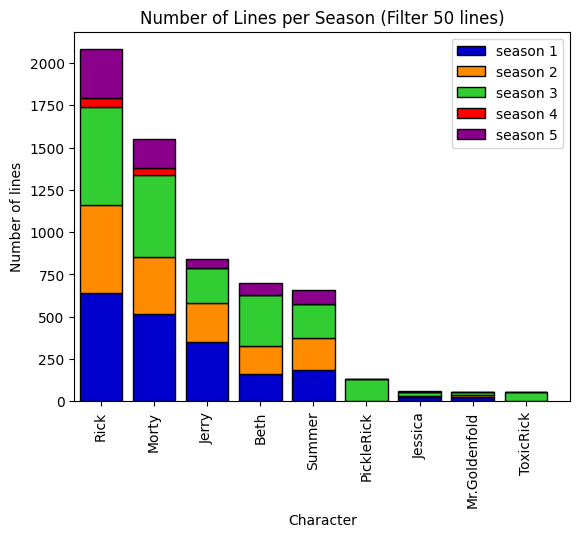

In [7]:
seasons_splitter = [(1,11) , (12,21) , (22,31) , (32,41) , (42,51) , (51, 70)]
seasons_dfs = []
y_axises = []

for splitter in seasons_splitter:
    seasons_dfs.append(df[(df["episode no."] >= splitter[0]) &  (df["episode no."] <= splitter[1])])

speakers = df["speaker"].value_counts().loc[lambda x: x > 50].index.tolist()

for season_df in seasons_dfs:
    y_axis = []
    for s in speakers:
        try: 
            y_axis.append(season_df["speaker"].value_counts()[s])
        except:
            y_axis.append(0)
    y_axises.append(y_axis)


plt.bar( speakers , np.array(y_axises[0]) , width=0.8 , color="mediumblue" , edgecolor="black")
plt.bar( speakers , np.array(y_axises[1]), bottom=np.array(y_axises[0])  , width=0.8 , color="darkorange" , edgecolor="black")
plt.bar( speakers , np.array(y_axises[2]), bottom=np.array(y_axises[1]) + np.array(y_axises[0]) , width=0.8 , color="limegreen" , edgecolor="black")
plt.bar( speakers , np.array(y_axises[3]), bottom=np.array(y_axises[2]) + np.array(y_axises[1]) + np.array(y_axises[0]), width=0.8 , color="red" , edgecolor="black")
plt.bar( speakers , np.array(y_axises[4]), bottom=np.array(y_axises[3]) + np.array(y_axises[2]) + np.array(y_axises[1]) + np.array(y_axises[0]), width=0.8 , color="darkmagenta", edgecolor="black")
plt.title("Number of Lines per Season (Filter 50 lines)")
plt.xlabel("Character")
plt.ylabel("Number of lines")
plt.xticks(rotation=90)
plt.xlim(-0.5,)
plt.legend( [ "season " + str(season + 1) for season in range(len(seasons_dfs))])        
plt.savefig('images/character_lines_per_season_50.png', format='png', transparent=True , bbox_inches="tight")


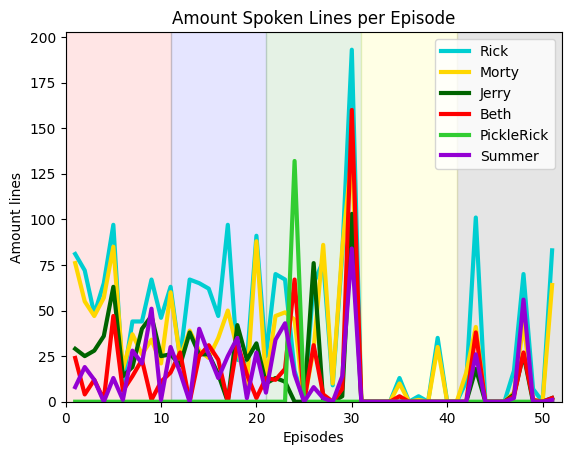

In [8]:
speaker_dataframes : list[pd.DataFrame] = []
speaker_names = ["Rick" , "Morty" , "Jerry" , "Beth" , "PickleRick" , "Summer"]

for speaker_name in speaker_names:
    speaker_dataframes.append(df[(df["speaker"] == speaker_name)])

speaker_lines_episode = []
episodes = np.array(range(51) ) + 1

for s_df in speaker_dataframes:
    speaker_y_vals = []
    for e in episodes:
        try:
            speaker_y_vals.append(s_df[(s_df["episode no."] == e)].shape[0])
        except IndexError:
            speaker_y_vals.append(0)

    speaker_lines_episode.append(speaker_y_vals)


plt.plot(episodes, speaker_lines_episode[0] , color="darkturquoise" , lw=3)
plt.plot(episodes, speaker_lines_episode[1] , color="gold" , lw=3 )
plt.plot(episodes, speaker_lines_episode[2] , color="darkgreen", lw=3 )
plt.plot(episodes, speaker_lines_episode[3] , color="red" , lw=3)
plt.plot(episodes, speaker_lines_episode[4] , color="limegreen", lw=3)
plt.plot(episodes, speaker_lines_episode[5] , color="darkviolet", lw=3)
plt.legend(speaker_names)
plt.title("Amount Spoken Lines per Episode")
plt.xlabel("Episodes")
plt.axvspan(0, 11, color='red', alpha=0.1 , ec="black" , label="Season 1")
plt.axvspan(11, 21, color='blue', alpha=0.1 , ec="black")
plt.axvspan(21, 31, color='green', alpha=0.1)
plt.axvspan(31, 41, color='yellow', alpha=0.1)
plt.axvspan(41, 52, color='black', alpha=0.1)
plt.legend(speaker_names)
plt.ylim(0,)
plt.xlim(0,52)
plt.ylabel("Amount lines")
plt.savefig('images/character_lines_per_episode.png', format='png', transparent=True)



## Word Analysis

In [9]:
from wordcloud import WordCloud
import spacy
from spacy.language import Language
from spacy.tokens import Doc
import nltk
from nltk.corpus import stopwords


### spcacy Pipeline

In [10]:
nlp = spacy.load("en_core_web_sm")
nlp.pipeline
nlp.remove_pipe("lemmatizer")

nltk.download('stopwords')
df['dialouge'] = df["dialouge"].apply(lambda x: x.lower())

df["dialouge"] = df["dialouge"].str.replace("[^\w\s]","" , regex=True)

@Language.component("stopword_remover")
def custom_remover(doc):
    stop_words = set(stopwords.words('english'))
    stop_words.update(["rick" , "morty" , "summer" , "beth" , "jerry" , "span" , "font"])
    valid_doc = [token.text for token in doc if token.text not in stop_words]
    valid_doc_pos = [token.pos_ for token in doc if token.text not in stop_words]

    return Doc(nlp.vocab , words=valid_doc , pos=valid_doc_pos)

nlp.add_pipe("stopword_remover" , after="ner")

df["dialouge"] = list(nlp.pipe(df["dialouge"]))
df["dialouge"] = [ " ".join([t.text for t in row]) for row in df["dialouge"]] # Comverting DOc in Text

corpus = " ".join(df.dialouge).replace("\n" , "").replace("  ","")
corpus

[nltk_data] Downloading package stopwords to /home/anton/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


' stumbles drunkenly turns lights got tacome jus got ta comerubs eyes going got surprise middle night talkingspills alcohol mortys bed come got surprise dragsankle come hurry pulls bedhallow ow tugging hard got ta go got ta get outta come got surprisedrives night sky thinkflying vehicle built outta stuff found garage yeah iits great surprise make bombcreate bomb bomb gon na drop get whole fresh start createwhole fresh start ttthats absolutely crazy come take easy gon na good rightgon na go pick little friend jessica jessica math classputs arm around mortys shoulders drop bombknow want somebody know want thinggon na make like new adam eve gon na adam ohh jessicas gon na eve whhhhwha surprise ca nt shoves away jessica nt even knowexist butbut forget ca nt blow humanity ii get trying say listen spillsalcohol shirt nt got yyou nt got ta worrytrying fool around jessica mess around jessicaanything kind guy talking youyou nt worry getting jessica anythingshshshe nt care jessica yyyyyyyyyyyou 

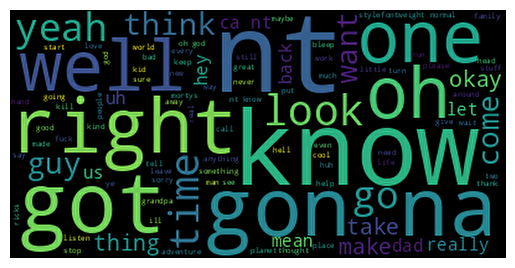

<Figure size 640x480 with 0 Axes>

In [11]:
wordcloud = WordCloud(max_words=100).generate(corpus)
plt.imshow(wordcloud, interpolation='sinc')
plt.axis("off")
plt.show()
plt.savefig('images/word_cloud_transcript.png', format='png')

### Description Analysis

In [12]:
PATH_TO_RAW_DATA = "/home/anton/Anton/Studium/DHBW /Semester_5/Text_Analysis/repo/Burg-NLP/data/episodes_descriptions.json"
PATH_TO_CLEAN_DATA = "/home/anton/Anton/Studium/DHBW /Semester_5/Text_Analysis/repo/Burg-NLP/topic_modeling/data/episodes_description.csv"

df = pd.read_json( PATH_TO_RAW_DATA , orient="index")



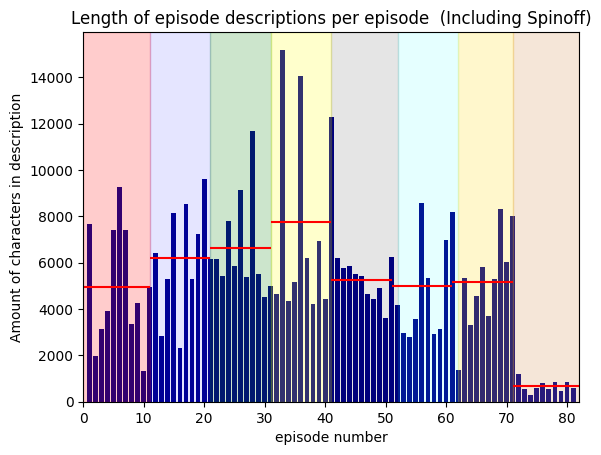

In [13]:
df["len_description"] = df["text"].apply(lambda x: len(x))
df["episode no."] = df.index + 1

seasons_splitter = [(1,11) , (12,21) , (22,31) , (32,41) , (42,51) , (51, 61), (62,71) , (72,82)]
seasons_dfs = []

for splitter in seasons_splitter:
    seasons_dfs.append(df[(df["episode no."] >= splitter[0]) &  (df["episode no."] <= splitter[1])])

season_len_means = [ x["len_description"].mean() for x in seasons_dfs]




plt.bar(df["episode no."] , df["len_description"] , color="darkblue")
plt.title("Length of episode descriptions per episode  (Including Spinoff)")
plt.xlabel("episode number")
plt.ylabel("Amount of characters in description")
plt.xlim(0,82)
plt.ylim(0,)
plt.axvspan(0, 11, color='red', alpha=0.2)
plt.axvspan(11, 21, color='blue', alpha=0.1)
plt.axvspan(21, 31, color='green', alpha=0.2)
plt.axvspan(31, 41, color='yellow', alpha=0.2)
plt.axvspan(41, 52, color='black', alpha=0.1)
plt.axvspan(52, 62, color='aqua', alpha=0.1)
plt.axvspan(62, 71, color='gold', alpha=0.2)
plt.axvspan(71, 82, color='peru', alpha=0.2)
plt.hlines(season_len_means[0] , xmin=0, xmax=11 , colors="red")
plt.hlines(season_len_means[1] , xmin=11, xmax=21 , colors="red")
plt.hlines(season_len_means[2] , xmin=21, xmax=31 , colors="red")
plt.hlines(season_len_means[3] , xmin=31, xmax=41 , colors="red")
plt.hlines(season_len_means[4] , xmin=41, xmax=51 , colors="red")
plt.hlines(season_len_means[5] , xmin=51, xmax=61 , colors="red")
plt.hlines(season_len_means[6] , xmin=61, xmax=71 , colors="red")
plt.hlines(season_len_means[7] , xmin=71, xmax=82 , colors="red")
plt.savefig('images/length_episode_description_with_spinoffs.png', format='png', transparent=True)

In [14]:
df = df[df.index < 71]

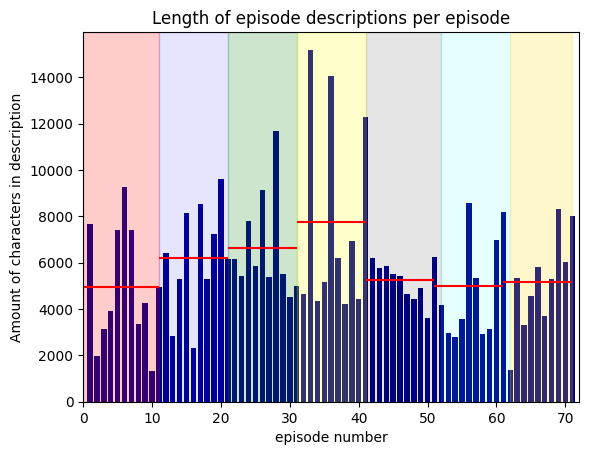

In [32]:
df["len_description"] = df["text"].apply(lambda x: len(x))
df["episode no."] = df.index + 1

seasons_splitter = [(1,11) , (12,21) , (22,31) , (32,41) , (42,51) , (51, 61), (62,71)]
seasons_dfs = []

for splitter in seasons_splitter:
    seasons_dfs.append(df[(df["episode no."] >= splitter[0]) &  (df["episode no."] <= splitter[1])])

season_len_means = [ x["len_description"].mean() for x in seasons_dfs]




plt.bar(df["episode no."] , df["len_description"] , color="darkblue")
plt.title("Length of episode descriptions per episode")
plt.xlabel("episode number")
plt.ylabel("Amount of characters in description")
plt.xlim(0,72)
plt.ylim(0,)
plt.axvspan(0, 11, color='red', alpha=0.2)
plt.axvspan(11, 21, color='blue', alpha=0.1)
plt.axvspan(21, 31, color='green', alpha=0.2)
plt.axvspan(31, 41, color='yellow', alpha=0.2)
plt.axvspan(41, 52, color='black', alpha=0.1)
plt.axvspan(52, 62, color='aqua', alpha=0.1)
plt.axvspan(62, 71, color='gold', alpha=0.2)
plt.hlines(season_len_means[0] , xmin=0, xmax=11 , colors="red")
plt.hlines(season_len_means[1] , xmin=11, xmax=21 , colors="red")
plt.hlines(season_len_means[2] , xmin=21, xmax=31 , colors="red")
plt.hlines(season_len_means[3] , xmin=31, xmax=41 , colors="red")
plt.hlines(season_len_means[4] , xmin=41, xmax=51 , colors="red")
plt.hlines(season_len_means[5] , xmin=51, xmax=61 , colors="red")
plt.hlines(season_len_means[6] , xmin=61, xmax=71 , colors="red")
plt.savefig('images/length_episode_description.png', format='png', transparent=True)

71
71


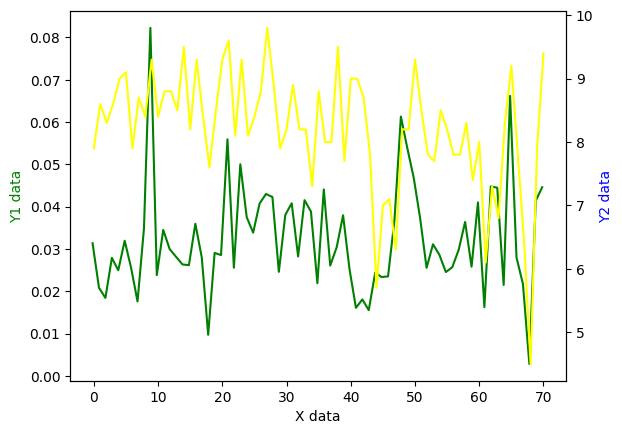

In [55]:
descriptions = df["text"].to_list()
substring = "ick"
amount_sub_str = [ text.count(substring) / len(text.split()) for text in descriptions ]
print(len(descriptions))
PATH_IMDB_RATINGS_CLEAN = "/home/anton/Anton/Studium/DHBW /Semester_5/Text_Analysis/repo/Burg-NLP/data/episodes.json"
df_imdb_ratings = pd.read_json(PATH_IMDB_RATINGS_CLEAN , orient="index")
print(len(df_imdb_ratings["rating"]))
x = range(71) 
# Creating plot with dataset_1


fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(np.array(x) - 0.2 , amount_sub_str, color='green')
ax2.plot(x, df_imdb_ratings["rating"], color='yellow')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')

plt.show()



In [57]:
np.corrcoef(amount_sub_str, df_imdb_ratings["rating"])
print(df_imdb_ratings["rating"].std())

0.9496986708384688
